In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import progressbar

folder = "store_XXZ_local_opt/"

In [10]:
!ls $folder

dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_10_S.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_10_Sz.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_10_maxdim.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_11_S.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_11_Sz.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_11_maxdim.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_12_S.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_12_Sz.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_12_maxdim.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_13_S.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_13_Sz.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_13_maxdim.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_14_S.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_14_Sz.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_14_maxdim.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_15_S.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_15_Sz.txt
dat__loc_N_10_Jx_-1.00_Jz_0.00_gamma_1.00_it_15_max

In [14]:
# list of all parameter generated

N = 20
Jx = -1.
Jz = 0.
gamma = .1
v_it = list(range(1,20))

n_sample = 256

pre = "dat__"

In [15]:
# collect all entropies, store in np array

# entropies
dat_S_opt = np.zeros((len(v_it), N+1, n_sample ))
dat_S_loc = np.zeros((len(v_it), N+1, n_sample ))

# <Sz> 
dat_n_opt = np.zeros((len(v_it), N, n_sample ))
dat_n_loc = np.zeros((len(v_it), N, n_sample ))

# can be structured better, with dict to collect data or so
for it in v_it:
    # get S
    suffix = "_N_{}_Jx_{:.2f}_Jz_{:.2f}_gamma_{:.2f}_it_{}".format(N,Jx,Jz,gamma,it)
    fn_opt = folder + pre + "opt" + suffix + "_S.txt"
    fn_loc = folder + pre + "loc" + suffix + "_S.txt"
    try:
        data_opt = np.loadtxt(fn_opt)
        data_loc = np.loadtxt(fn_loc)
        dat_S_opt[it-1,:,:] = data_opt.T
        dat_S_loc[it-1,:,:] = data_loc.T
    except:
        print("file " + fn_opt + " or " + fn_loc + " does not exist")
        
    # get Sz
    fn_opt = folder + pre + "opt" + suffix + "_Sz.txt"
    fn_loc = folder + pre + "loc" + suffix + "_Sz.txt"
    try:
        data_opt = np.loadtxt(fn_opt)
        data_loc = np.loadtxt(fn_loc)
        dat_n_opt[it-1,:,:] = data_opt.T
        dat_n_loc[it-1,:,:] = data_loc.T
    except:
        print("file " + fn_opt + " or " + fn_loc + " does not exist")


Text(0.5, 1.0, 'Entanglement profile, last time collected')

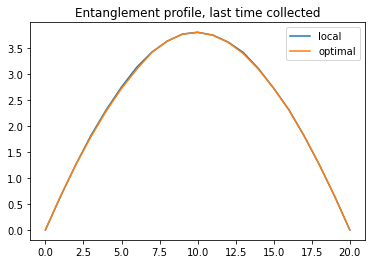

In [16]:
it = -1 # time index to plot, average over all collected trajectories

plt.plot(np.mean(dat_S_loc[it], axis=-1), label="local")
plt.plot(np.mean(dat_S_opt[it], axis=-1), label="optimal")
plt.legend()
plt.title("Entanglement profile, last time collected")

Text(0.5, 1.0, "$\\langle a^\\dagger a\\rangle$'s, last time collected (they must be the same)")

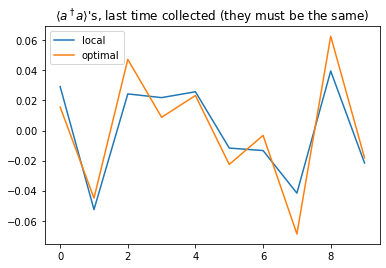

In [8]:
it = -1

plt.plot(np.mean(dat_n_loc[it], axis=-1), label="local")
plt.plot(np.mean(dat_n_opt[it], axis=-1), label="optimal")
plt.legend()
plt.title(r"$\langle a^\dagger a\rangle$'s, last time collected (they must be the same)")

#print("The distribution seems skewed (for both optimal and local). Perhaps this is because Jz is antiferromagnetic now and incommensure with lattice)")

In [21]:
!type python

python is /opt/packages/anaconda3/bin/python


In [ ]:
!/opt/packages/anaconda3/bin/python -m pip install --user LightGBM

In [ ]:
import LightGBM